# Exercise 2

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math

In [2]:
# def the terminal cost function 
def g_termin(x):
    if x==0:
        return 0
    else:
        return math.inf
# def the running cost function
def g_cost(x,u):
    if x+u <-4 or x+u>4 :
        return math.inf
    else:
        return (x+4)*(x+4)+u*u

In [3]:
# def one step minimization w.r.t the next cost-to-go J
def one_step_min(x,U,J,g_cost):
    # initialization
    opt = math.inf
    opt_ctrl = math.inf
    ctrl = np.empty(1)
    # iteration over all controls
    for u in U:
        x1 = x+u
        if x1>=-4 and x1<=4:
            index = x1+4 
            # cost-to-go 
            temp = g_cost(x,u)+ J[index]
            # if it equals the current optimal, then the control is added
            if temp == opt:
                ctrl = np.append(ctrl,[u])
            #if it surpass the current optimal, then the control is replaced
            if temp < opt:
                opt_ctrl = u
                opt = temp
                ctrl = np.array([u])
    # if all controls lead to inf cost, then the first element of ctrl array shall be deleted
    # because it is arbitrarily generated by np.empty(1)
    if opt == math.inf:
        ctrl = ctrl[1:]
    return opt, ctrl

After we define one_step_min function for solving n-stage cost-to-go given (n+1)-stage cost-to-go, we can now define a function named dp for sloving the whole problem using dynamic programming by backward induction.

In [4]:
def dp(X,U,g_cost,g_termin, T):
    J_opt = np.zeros((X.size,T+1))
    ctrl_opt = np.zeros((X.size,T))
    # terminal cost
    J = np.zeros(X.size)
    i = 0
    # compute the terminal cost
    for x in X:
        J[i] = g_termin(x)
        i = i+1
    J_opt[:,-1]=J 
    # backward induction
    for t in range(T):
        i = 0
        J_t=np.zeros(X.size)
        for x in X:
            # one step minimiztion 
            J_t[i],ctrl= one_step_min(x, U, J, g_cost)
            index = x+4
            # record the current control
            ctrl_opt[index,T-1-t]=ctrl[0]
            i =  i+1
        J_opt[:,T-1-t]=J_t     
        J = J_t    
    return J_opt, ctrl_opt
        

After obtaining the optimal cost and control, we define a function for tacking the control and states evolution for a given initial state.

In [5]:
# For a given initial state, return a state sequence and a control sequence which correpsonds to the optimial case.
def state_ctrl_seq(x,ctrl_opt,T):
    ctrl_seq = np.empty(T)
    state_seq = np.empty(T+1)
    state_seq[0] = x
    for t in range(T):
        index = int(x+4)
        u = ctrl_opt[index,t]
        x = x+u
        ctrl_seq[t]=u
        state_seq[t+1]=x
    return state_seq, ctrl_seq

(a) Implement the DP in python and obtain the optimal cost-to-go J_opt and controls ctrl_opt

In [6]:
# we run the dp algorithm for solving the problem
U = np.linspace(-2,2,5,dtype=int)
X = np.linspace(-4,4,9,dtype=int)
T = 15
J_opt, ctrl_opt = dp(X,U,g_cost,g_termin, T)

(b) cost-to-go for $x_4=4$

In [7]:
x=4
t=4
index =x+4
J_opt[index,t]

146.0

(c) Give two plots and optimal costs.

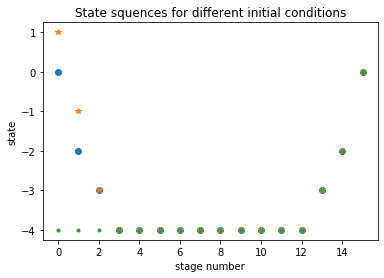

In [7]:

# x=0
state0, ctrl0=state_ctrl_seq(0,ctrl_opt,T)
# x=1
state1, ctrl1=state_ctrl_seq(1,ctrl_opt,T)
# x=-4
state_4, ctrl_4=state_ctrl_seq(-4,ctrl_opt,T)
horizon = np.linspace(0,T,T+1)
# state sequence plot
plt.title('State squences for different initial conditions')
plt.xlabel('stage number')
plt.ylabel('state')
plt.plot(horizon,state0,'o')
plt.plot(horizon,state1,'*')
plt.plot(horizon,state_4,'.')

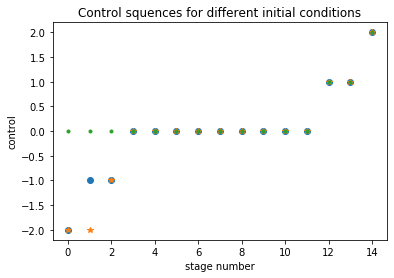

In [8]:
# control sequence plot
plt.title('Control squences for different initial conditions')
plt.xlabel('stage number')
plt.ylabel('control')
plt.plot(horizon[:-1],ctrl0,'o')
plt.plot(horizon[:-1],ctrl1,'*')
plt.plot(horizon[:-1],ctrl_4,'.')

In [9]:
# optimal cost for (x=0, index=4), (x=1, index=5), (x=-4, index=0)
np.array([J_opt[4,0],J_opt[5,0],J_opt[0,0]])

array([38., 55., 11.])

(d) Solving the problem with New terminal cost

In [11]:
#define new terminal cost
def g_termin_zero(x):
    return 0

In [12]:
J_opt0, ctrl_opt0 = dp(X,U,g_cost,g_termin_zero, T)
# x=0
state0, ctrl0=state_ctrl_seq(0,ctrl_opt0,T)
# x=1
state1, ctrl1=state_ctrl_seq(1,ctrl_opt0,T)
# x=-4
state_4, ctrl_4=state_ctrl_seq(-4,ctrl_opt0,T)
horizon = np.linspace(0,T,T+1)

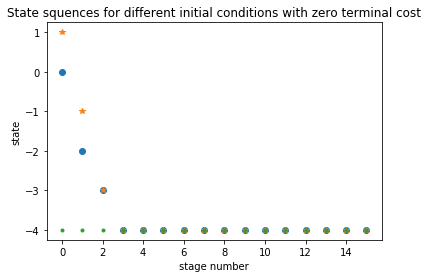

In [13]:
# state sequence plot
plt.title('State squences for different initial conditions with zero terminal cost')
plt.xlabel('stage number')
plt.ylabel('state')
plt.plot(horizon,state0,'o')
plt.plot(horizon,state1,'*')
plt.plot(horizon,state_4,'.')

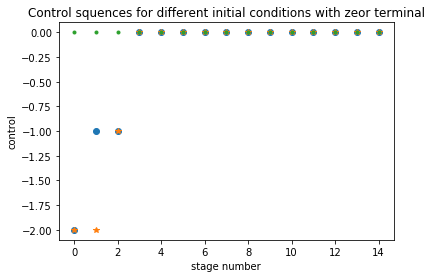

In [14]:
# control sequence plot
plt.title('Control squences for different initial conditions with zeor terminal')
plt.xlabel('stage number')
plt.ylabel('control')
plt.plot(horizon[:-1],ctrl0,'o')
plt.plot(horizon[:-1],ctrl1,'*')
plt.plot(horizon[:-1],ctrl_4,'.')

In [15]:
# optimal cost for (x=0, index=4), (x=1, index=5), (x=-4, index=0)
np.array([J_opt0[4,0],J_opt0[5,0],J_opt0[0,0]])

array([27., 44.,  0.])

Obviously, we can observe that change in the state sequences plot, where the "U" shape is replaced by "L" shape, meaning that for the later, once state turn into -4, the desired state, the control became inactive, since there is no need to do anyhting else, after all all states enjoy zero terminal cost. To be more specific, in the first case, there are two tasks for the control: first, push the state towards -4 to minimize the running cost and second, pull it back to zero for minimizing the terminal cost, which eventually leads to a "U". Therefore, in the first case, the controls first reduce the state as well as maintain the desired state once achieved and finally increase it to zero. While for the second case, increasing to zero is no longer needed, so staying at the desired state once achieved become the optimal one.   

(e)Solving the problem with New running cost

In [16]:
# define new running cost
def g_cost_new(x,u):
    if x+u <-4 or x+u>4 :
        return math.inf
    else:
        return (x+4)*(x+4)

In [17]:
J_opt0, ctrl_opt0 = dp(X,U,g_cost_new,g_termin_zero, T)
# x=0
state0, ctrl0=state_ctrl_seq(0,ctrl_opt0,T)
# x=1
state1, ctrl1=state_ctrl_seq(1,ctrl_opt0,T)
# x=-4
state_4, ctrl_4=state_ctrl_seq(-4,ctrl_opt0,T)
horizon = np.linspace(0,T,T+1)

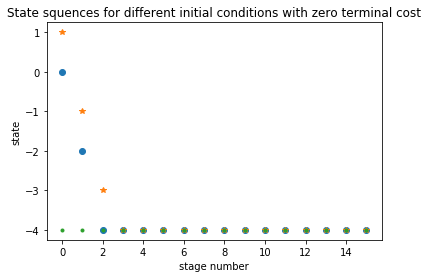

In [18]:
# state sequence plot
plt.title('State squences for different initial conditions with zero terminal cost')
plt.xlabel('stage number')
plt.ylabel('state')
plt.plot(horizon,state0,'o')
plt.plot(horizon,state1,'*')
plt.plot(horizon,state_4,'.')

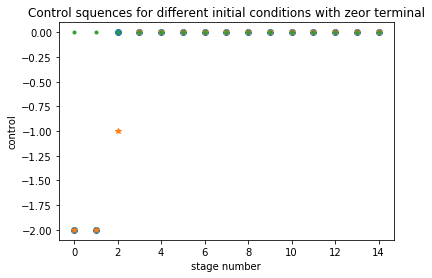

In [19]:
# control sequence plot
plt.title('Control squences for different initial conditions with zeor terminal')
plt.xlabel('stage number')
plt.ylabel('control')
plt.plot(horizon[:-1],ctrl0,'o')
plt.plot(horizon[:-1],ctrl1,'*')
plt.plot(horizon[:-1],ctrl_4,'.')

In [20]:
# optimal cost for (x=0, index=4), (x=1, index=5), (x=-4, index=0)
np.array([J_opt0[4,0],J_opt0[5,0],J_opt0[0,0]])

array([20., 35.,  0.])

Not surprisingly, the optimal cost again shrinks, which is due to the disappearing control cost. Also, since control cost is no longer an issue, our control becomes more aggressive, for example, for $x_0=0$, in the last question, we apply $u_0=-2$ and $u_1=u_2=-1$ to reduce the state, which means we prefer applying "milder" control more ofen rather than applying $-2$ twice to reduce the state to the most at once as what we have in this question.  The reason behind this is that we on longer care the cost of control and what we only look at is how far our current state is away from the dersired one as well as how soon we can get there. Therefore, we shall adpot an aggressive policy to change the state as soon as possible, no matter how expensive the control is. 

# Exercise 3

In [21]:
import matplotlib as mp
np.set_printoptions(precision=5,linewidth=120,suppress=True)
import bisect

In [22]:
def display_result(world_mat, path):
    """
    This function displays a maze described in world_mat and a path inside the maze
    world_mat: a NxN matrix that contains the maze (0 for free path, -10 for obstacle)
    path: a list of elements numbered as the graph (i.e. from 0 to N**2-1)
    """
    N = world_mat.shape[0]
    display_mat = world_mat.copy()
    for el in path:
        display_mat[convert_to_matrixindex(el,N)] = 5
    plt.matshow(display_mat, cmap='Greys')
    
def convert_to_listindex(i,j,N):
    """
    This function converts a (i,j) matrix entry index to a list index for matrix of size N
    """
    return N*i+j

def convert_to_matrixindex(a,N):
    """
    This function converts a list entry a into a (i,j) matrix entry for matrix of size N
    """
    i = int(a/N) # the result of integer division
    j = int(a%N) # the  remainder of the division
    return i,j

def create_graph(world_mat):
    """
    This functions takes a NxN matrix in entry and creates a graph and a map of costs
    Since we use lists, for a world_mat of size NxN, we associate to the entry [i,j] of world_map
    the index a=N*i + j of the list
    output:
        graph: a list of neighbors  (indexed as explained above)
        cost: a N**2 x  N**2 array. Each entry cost[i,j] contains the cost of transitioning from node i to node j
            it is infinite if there is no edge from i to j
    """
    N = world_mat.shape[0]
    graph = []
    for i in range(N):
        for j in range(N):
            neigh = []
            if(i!=N-1):
                if(world_mat[i+1,j]==0):
                    neigh.append(N*(i+1)+j)
            if(i!=0):
                if(world_mat[i-1,j]==0):
                    neigh.append(N*(i-1)+j)
            if(j!=N-1):
                if(world_mat[i,j+1]==0):
                    neigh.append(N*i+j+1)
            if(j!=0):
                if(world_mat[i,j-1]==0):
                    neigh.append(N*i+j-1)
            graph.append(neigh)
    
    cost = np.ones([N*N,N*N]) * np.inf
    
    for i in range(N*N):
        for j in graph[i]:
            cost[i,j] = 1
    
    return graph, cost

[[ 0.  0.  0.  0. 10.]
 [ 0. 10. 10.  0.  0.]
 [ 0. 10.  0.  0.  0.]
 [ 0.  0.  0. 10.  0.]
 [ 0. 10. 10.  0.  0.]]


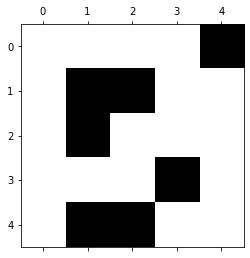

In [23]:
# let's create a map corresponding to the robot path planning example of lecture 3
# it is a 5x5 grid
world_map = np.zeros([5,5])
# and it contains obstacles which we mark as non 0
world_map[0,4] = 10
world_map[1,1:3] = 10
world_map[2,1] = 10
world_map[3,3] = 10
world_map[4,1:3] = 10

# we can print the matrix
print(world_map)

# we can now display the result
display_result(world_map, [])

(0, 0)
(0, 1)
(0, 2)
(0, 3)
(1, 3)
(1, 4)
(2, 4)
(3, 4)
(4, 4)


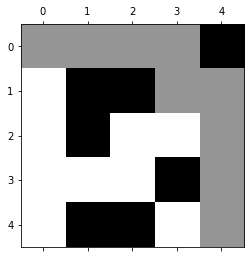

In [24]:
# let's assume we have a path from (0,0) to (4,4) that does (in linear index)
path = [0,1,2,3,8,9,14,19,24]

# we print the equivalent in matrix entries
for a in path:
    print(convert_to_matrixindex(a, 5))

# and we display it on the world grid (shown in grey)
display_result(world_map, path)

In [25]:
# we can also create the associated graph and costs
graph, cost = create_graph(world_map)

# the neighbors of entry the cell [0,0] are
print('Neighbors of entry [0,0]')
a = convert_to_listindex(0,0,5)
neighborhs = graph[a]
for n in neighborhs:
    print('in linear indexes: ' + str(n) + ' which corresponds to the matrix entry: ' + str(convert_to_matrixindex(n,5)))
    
print('\n\nNeighbors of entry [2,3]')
a = convert_to_listindex(2,3,5)
neighborhs = graph[a]
for n in neighborhs:
    print('in linear indexes: ' + str(n) + ' which corresponds to the matrix entry: ' + str(convert_to_matrixindex(n,5)))

Neighbors of entry [0,0]
in linear indexes: 5 which corresponds to the matrix entry: (1, 0)
in linear indexes: 1 which corresponds to the matrix entry: (0, 1)


Neighbors of entry [2,3]
in linear indexes: 8 which corresponds to the matrix entry: (1, 3)
in linear indexes: 14 which corresponds to the matrix entry: (2, 4)
in linear indexes: 12 which corresponds to the matrix entry: (2, 2)


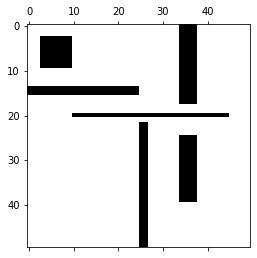

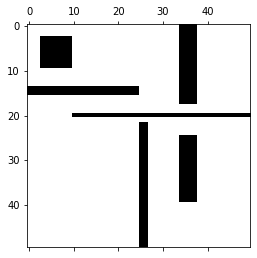

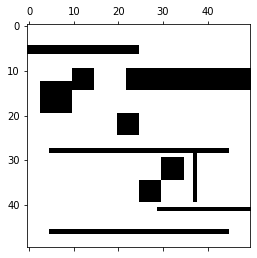

In [26]:
# here we load the 3 mazes and display them
maze1 = np.load('maze1.npy')
display_result(maze1, [])

maze2 = np.load('maze2.npy')
display_result(maze2, [])

maze3 = np.load('maze3.npy')
display_result(maze3, [])

(a)using depth-first to find the shortest path. Important statistics (number of tested nodes and length) are summarized in question (d).

In [32]:
# depth-first search in shortest path problem
def depth_first(graph,cost,N):
    #initialization distance array, parent array, UPPER
    dist = np.ones(N*N)*math.inf
    parent = np.ones(N*N)*math.inf
    UPPER = math.inf
    dist[0] = 0
    OPEN = [0]
    CURRENT = []
    count = 0
    while OPEN:
        # num of tested nodes
        count =count+1
        # DFS: using stack
        CURRENT = OPEN.pop()
        neigh = graph[CURRENT]
        for j in neigh:
            #for all its children
            d = dist[CURRENT]+cost[CURRENT,j]
            if d <min(dist[j], UPPER):
                dist[j] = d
                parent[j]= CURRENT
                # if the child is not the termination
                if j!= N*N-1:
                    if not (j in OPEN):
                        OPEN.append(j)
                else: UPPER = dist[j]
    # no path exists                
    if dist[N*N-1]==math.inf:
        print('no path')
        return 
    # creat the path list from parent
    path = [N*N-1]
    tail = int(N*N-1)
    while tail!=0:
        head = parent[tail]
        head = int(head)
        path.insert(0,head)
        tail = head
    print ('The number of testes nodes:'+str(count)+' and the length of the path:'+str(len(path)-1))
    return path

The number of testes nodes:17 and the length of the path:8


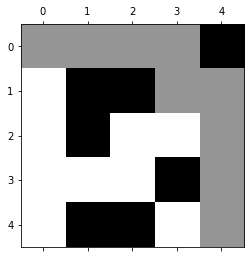

In [33]:
#world_map 
path=depth_first(graph,cost, N=5)
display_result(world_map, path)

The number of testes nodes:223241 and the length of the path:98


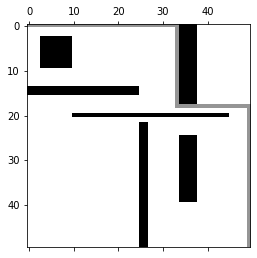

In [34]:
#maze 1
graph1, cost1 = create_graph(maze1)
path1=depth_first(graph1,cost1, N=50)
display_result(maze1, path1)

The number of testes nodes:176721 and the length of the path:130


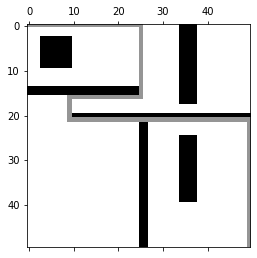

In [35]:
#maze 2
graph2, cost2 = create_graph(maze2)
path2=depth_first(graph2,cost2, N=50)
display_result(maze2, path2)

The number of testes nodes:332734 and the length of the path:140


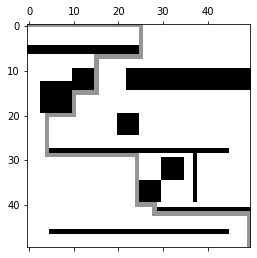

In [36]:
#maze 3
graph3, cost3 = create_graph(maze3)
path3=depth_first(graph3,cost3, N=50)
display_result(maze3, path3)

(b) using breadth-first algorithm for question (a). Important statistics (number of tested nodes and length) are summarized in question (d).

In [38]:
# breadth-first search in shortest path problem
# almost the same idea as in the DFS
def breadth_first(graph,cost,N):
    #initialization distance array, parent array, UPPER
    dist = np.ones(N*N)*math.inf
    parent = np.ones(N*N)*math.inf
    UPPER = math.inf
    dist[0] = 0
    OPEN = [0]
    CURRENT = []
    count = 0
    while OPEN:
        count = count+1
        # the only difference: using queue in BFS
        CURRENT = OPEN.pop(0)
        neigh = graph[CURRENT]
        for j in neigh:
            d = dist[CURRENT]+cost[CURRENT,j]
            if d <min(dist[j], UPPER):
                dist[j] = d
                parent[j]= CURRENT
                if j!= N*N-1:
                    if not (j in OPEN):
                        OPEN.append(j)
                else: UPPER = dist[j]   
                    
    if dist[N*N-1]==math.inf:
        print('no path')
        return 
    path = [N*N-1]
    tail = int(N*N-1)
    while tail!=0:
        head = parent[tail]
        head = int(head)
        path.insert(0,head)
        tail = head
    print ('The number of testes nodes:'+str(count)+' and the length of the path:'+str(len(path)-1))
    return path

The number of testes nodes:16 and the length of the path:8


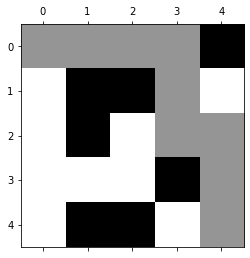

In [39]:
#world_map
pathb=breadth_first(graph,cost, N=5)
display_result(world_map, pathb)

The number of testes nodes:2024 and the length of the path:98


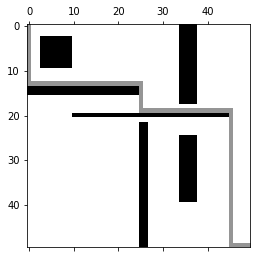

In [40]:
#maze1
pathb1=breadth_first(graph1,cost1, N=50)
display_result(maze1, pathb1)

The number of testes nodes:2172 and the length of the path:130


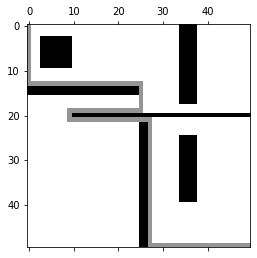

In [41]:
#maze2
pathb2=breadth_first(graph2,cost2, N=50)
display_result(maze2, pathb2)

The number of testes nodes:2048 and the length of the path:140


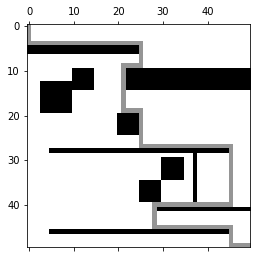

In [42]:
#maze3
pathb3=breadth_first(graph3,cost3, N=50)
display_result(maze3, pathb3)

(c)$A^*$ Algorithm for question(a). We first define the function which implements the algorithm and then apply it to each case. These heuristics are indeed under-estimators as eplained as follows. First, for zero heuristics, it is appreantly an under-estimator, since the start and the end don't coincide and movements must be needed. For the second heuristics, it is also true because it computes the shortest path distance in the ideal case, i.e. there is no obstacles at all. Hence, in our cases, where there are obstacles, the true cost-to-go is bound to surpass the ideal one.  

In [43]:
# A* algo in shortest path problem
def A_star(graph,cost,N,H):
    #initialization distance array, parent array, UPPER
    dist = np.ones(N*N)*math.inf
    # heuristic cost-to-go
    V = np.ones(N*N)*math.inf
    parent = np.ones(N*N)*math.inf
    dist[0] = 0
    V[0]=dist[0]+H[0,0]
    OPEN = [0]
    CURRENT = []
    CLOSED = []
    count = 0
    while OPEN:
        count = count+1
        CURRENT = OPEN.pop(0)
        CLOSED.append(CURRENT)
        # if reach the termination then stop
        if CURRENT == N*N-1:
            break
        neigh = graph[CURRENT]
        for j in neigh:
            if not (j in CLOSED):
                d = dist[CURRENT]+cost[CURRENT,j]
                if d <dist[j]:
                    dist[j] = d
                    parent[j]= CURRENT
                    cord1, cord2=convert_to_matrixindex(j, N)
                    #update the heuristic cost-to-go
                    V[j]=dist[j]+H[cord1,cord2]
                    # insert the new node accordingly
                    index=sorted_list_insert(j,OPEN,V)
                    OPEN.insert(index,j)
                  
    if dist[N*N-1]==math.inf:
        print('no path')
        return 
                   
    path = [N*N-1]
    tail = int(N*N-1)
    while tail!=0:
        head = parent[tail]
        head = int(head)
        path.insert(0,head)
        tail = head
    print ('The number of testes nodes:'+str(count)+' and the length of the path:'+str(len(path)-1))
    return path

def sorted_list_insert(j,l,V):
    index = 0
    for i in l:
        if V[j]<V[i]:
            l.insert(index,j)
            break
        index = index +1
    return index

The number of testes nodes:17 and the length of the path:8


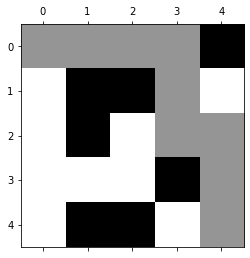

In [44]:
#world map: zero heurisric
N=5
H0=np.zeros((N,N))
path_h0=A_star(graph,cost,N,H0)
display_result(world_map, path_h0)

The number of testes nodes:18 and the length of the path:8


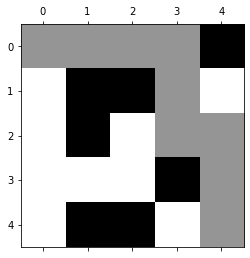

In [45]:
#world_map: ideal heuristic
N=5
H1=np.zeros((N,N))
goal = np.array([N-1, N-1])
for i in range(N):
    for j in range(N):
        H1[i,j]=abs(i-goal[0])+abs(j-goal[1])
path_h1=A_star(graph,cost,N,H1)
display_result(world_map, path_h1)        

The number of testes nodes:2025 and the length of the path:98


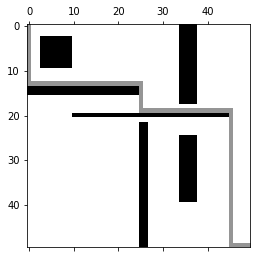

In [46]:
#maze1: zero heurisric
N=50
H0=np.zeros((N,N))
path1_h0=A_star(graph1,cost1,N,H0)
display_result(maze1, path1_h0)

The number of testes nodes:905 and the length of the path:98


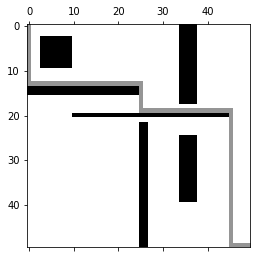

In [47]:
#maze1: ideal heuristic
N=50
H1=np.zeros((N,N))
goal = np.array([N-1, N-1])
for i in range(N):
    for j in range(N):
        H1[i,j]=abs(i-goal[0])+abs(j-goal[1])
path1_h1=A_star(graph1,cost1,N,H1)
display_result(maze1, path1_h1)    

The number of testes nodes:2173 and the length of the path:130


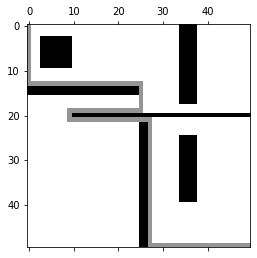

In [48]:
#maze2: zero heurisric
N=50
H0=np.zeros((N,N))
path2_h0=A_star(graph2,cost2,N,H0)
display_result(maze2, path2_h0)

The number of testes nodes:3009 and the length of the path:130


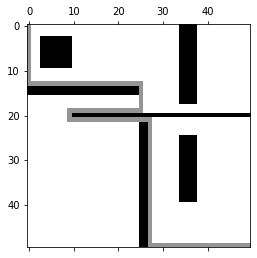

In [49]:
#maze2: ideal heuristic
N=50
H1=np.zeros((N,N))
goal = np.array([N-1, N-1])
for i in range(N):
    for j in range(N):
        H1[i,j]=abs(i-goal[0])+abs(j-goal[1])
path2_h1=A_star(graph2,cost2,N,H1)
display_result(maze2, path2_h1) 

The number of testes nodes:2049 and the length of the path:140


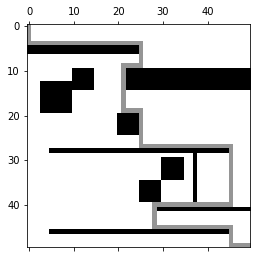

In [50]:
#maze3: zero heurisric
N=50
H0=np.zeros((N,N))
path3_h0=A_star(graph3,cost3,N,H0)
display_result(maze3, path3_h0)

The number of testes nodes:2828 and the length of the path:140


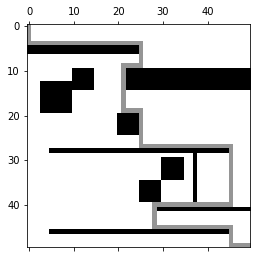

In [52]:
#maze3: ideal heuristic
N=50
H1=np.zeros((N,N))
goal = np.array([N-1, N-1])
for i in range(N):
    for j in range(N):
        H1[i,j]=abs(i-goal[0])+abs(j-goal[1])
path3_h1=A_star(graph3,cost3,N,H1)
display_result(maze3, path3_h1) 

(d)We first summarize our experiment results(number of tested nodes) as a table: DFS for depth-first search, BFS for breadth-first, zero for $A^*$ using zero heuristics and ideal for using ideal distance heuristics

|           | DFS    | BFS  | zero | ideal |
|-----------|--------|------|------|-------|
| world_map | 17     | 16   | 17   | 18    |
| maze1     | 223241 | 2024 | 2025 | 905   |
| maze2     | 176721 | 2172 | 2173 | 3009  |
| maze3     | 332734 | 2048 | 2049 | 2828  |

First, we notice that for world_map, a relatively simple graph, the four don't differ too much. However, for some complicated graphs, when the heuristics is a good estimate, $A^*$ algo magnificently reduces the number, as we observe in maze1 case. On the other hand, when the estimate is far wawy from the true one, the algorithm may not perform well, as we see in maze2 and 3, where "U-turn" appears multiple times failing the heuristics. Besides, we notice that a trivial heuristics may not be helpful at all, as shown in zero-heuristics case where the number of teseted nodes is the same as the one in BFS.
To sum up,for $A^*$: 
__pros: good heuristics significantly speed up the search; cons: bad or trivial ones may not be of help__

As for BFS and DFS, we see that the two behave equally well in the simple case whereas BFS outperforms DFS for the remaining more challenging ones. However, we think it is a matter of the question rather than algorithm itself and in other words, they are of the same time complexity but the topology of the graph make DFS less efficient. This is because the termination lies in the bottom left, and there are some dead ends in between, which make DFS go back and restart searching. To sum up, for DFS and BFS: __pro: BFS is suitable for cases where end is quite close to the start and there are many dead ends while DFS is suitable for cases where the end is far away; cons: BFS requires more memory and is generally slower while DFS is more seneitive to the topology__ 